# Different Tests for means, variance and proportions


1. One Sample
    1. One sample z Test - taking sample from one source/machine 
    2. One sample t Test - performing t test when either there is less number of samples(<30) or don't know populations standard deviations
    3. One Proportion Test - Compare proportions of sample from lower standard or population
    4. One Variance Test -  Compare variance of sample and population
2. Two Sample - compare two samples
    1. Two sample z Test 
    2. Two sample t Test
    3. Paired t test - before and after result of machine
    4. Two Proportion Test
    5. Two Variance Test
3. More Than 2 sample
    * ANOVA 
    
    
## Hypothesis test steps-

1. State alternate hypothesis
2. State the Null Hypothesis
3. Select a probability of error level(alpha level). Generally 0.05
4. Calculate the test statistic (t or z score)
5. Critical test statistic
6. Interpret th e results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats
import scipy.stats as stats

# One Sample Z Test 

### Conditions for doing z test

1. Ramdom samples
2. Each observation should be independent of other
    * Sample with replacement
    * If sampling without replacement, the sample size should not be more tha 10%
3. Sampling distribution approximates Normal Distribution
    * Population is Normally Distributed and the population standard deviation id known ***OR***
    * Sample size >= 30
    
### Example
1. Perfumed bottle producing 159cc with sd of 2 cc, 100 bottles are randomly picked and the average volume was found to be 150.2 cc. Has mean volume changed?(95% confidence)

        Ha : mean  != 150 cc
        alpha = 1-95 = 0.05

        Z_calc  = (x — μ) / (σ / √n)
                = (150.2-150)/[2/sqrt(100)]
                = 0.2/0.2 
                = 1
---------------   
        Reference Table--->
            aplha = 0.05 One Tail Z_crit = 1.645
            aplha = 0.10 One Tail Z_crit = 1.282
            aplha = 0.05 Two Tail Z_crit = 1.960
            aplha = 0.10 Two Tail Z_crit = 1.645

-----------------

        Z_crit = 1.96
        Z_calc< Z_crit => Failed to reject null hypothesis

2. Perfumed bottle producing 159cc with sd of 2 cc, 100 bottles are randomly picked and the average volume was found to be 150.2 cc. Has mean volume increased?(95% confidence)

        Ha : mean > 150 cc
        Z_calc  = (150.2-150)/[2/sqrt(100)]
                = 0.2/0.2 
                = 1
                
        z_crit =  1.645 
        
        z_calc < z_crit => Failed to reject null hypothesis


### Solving example using python

1. Loading raw data from machine 1 and understanding data-

In [3]:
df = pd.read_csv('C:\\Users\\Kritika\\Desktop\\udemy_stats\\Machine1.csv')

In [4]:
df.head()

,Machine 1
0,152.63
1,152.94
2,151.29
3,153.44
4,148.58


In [5]:
df.describe()

,Machine 1
count,100.000000
mean,150.203100
std,2.018812
min,145.550000
25%,148.717500
50%,150.285000
75%,151.502500
max,154.550000


2. Understanding the distribution of data-

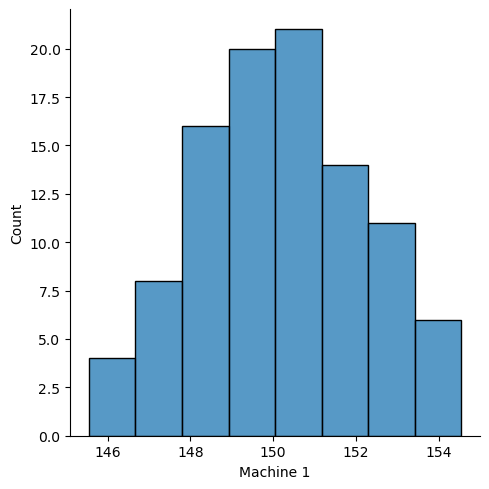

In [6]:
sns.displot(data = df, x = 'Machine 1')
plt.show()

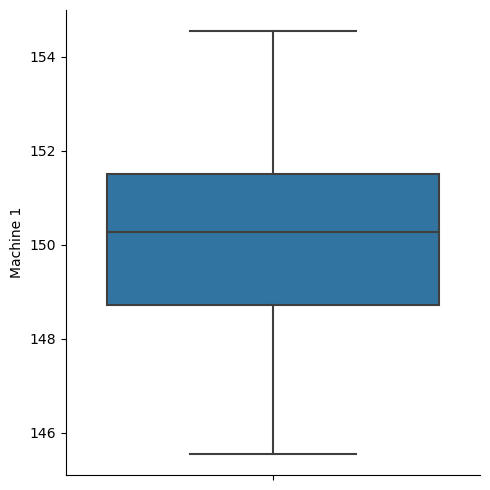

In [10]:
sns.catplot(data = df, y='Machine 1', kind = 'box')
plt.show()

3. z test

In [11]:
df['Machine 1']

0     152.63
1     152.94
2     151.29
3     153.44
4     148.58
       ...  
95    150.03
96    146.79
97    150.02
98    146.42
99    152.51
Name: Machine 1, Length: 100, dtype: float64

In [12]:
weightstats.ztest(x1 = df['Machine 1'], value = 150, alternative = 'two-sided')

(1.0060370247722599, 0.3143977600779597)

In above result, 1st value is z calculated and 2nd value is p value.
p value is 0.314 which is higher than alpha 0.05, therefore failed to reject null hypothesis, i.e., not enough evidence to say volume has changed.

In scipy library, we don't have z test but has t test. 

4. One sided tail test
- has volume increased-

In [5]:
weightstats.ztest(df['Machine 1'], value=150, alternative='larger')

(1.0060370247722599, 0.15719888003897986)

Conclusion-
p-value for both two sided and single sided t-test was larger than alpha, therefore volume has not changed


# One Sample t test

### Conditions for performing t-test

1. Ramdom samples
2. Each observation should be independent of other
    * Sample with replacement
    * If sampling without replacement, the sample size should not be more tha 10%
3. Sampling distribution approximates Normal Distribution
    * Population is Normally Distributed and the population standard deviation id unknown ***OR***
    * Sample size < 30 
    
### Example-
1. Perfume bottle producing 150cc, 4 bottles are randomly picked and the average volume was found to be 151cc and sd of the sample bottles was 2cc. Has mean volume changed? (95% confidence)
            Ha: mean =! 150 cc
            alpha = 0.05
            t_calc  = (x — μ) / (s / √n), where x is mean of sample, μ is mean volume of population, s is sample std and n is sample size
                    = (151-150)/[2/sqrt(4)]
                    = 1/1 
                    = 1

-------
Reference for t_critical value, where df represents degree of freedom, i.e., number of items picked-1

    aplha = 0.05 | One Tail | Df = 3 | t_crit = 2.353
    aplha = 0.05 | Two Tail | Df = 3 | t_crit = 3.182

------
            t_crit = 3.182
            t_calc < t_crit therefore failed to reject null hypothesis


### Solving example using python

In [13]:
volume = pd.Series([148.5, 153.4, 150.9, 151.2])
volume.describe()

count      4.000000
mean     151.000000
std        2.004994
min      148.500000
25%      150.300000
50%      151.050000
75%      151.750000
max      153.400000
dtype: float64

In [14]:
stats.ttest_1samp(volume, 150)

Ttest_1sampResult(statistic=0.997509336107632, pvalue=0.3920333832606524)

# One Proportion Test

### Conditions for performing one proportion test

1. Ramdom samples
2. Each observation should be independent of other
   * Sample with replacement
   * If sampling without replacement, the sample size should not be more tha 10%
3. The data contains only two categories, such as pass/fail or yes/no
4. For normal approximation:
    * both np>= 10 and n(1-p)>=(data should have at least 10 "successes" and at least 10 "failures")
    
### Example
1. Smoking rate in a town in past was 21%, 100 samples were picked and found 14 smokers. Has smoking habit changed?

    Can Normality assumptions be made?
    
        * p0 = 0.21, p= 0.14
        * np0 = 0.21x100 = 21
        * n(1-p0) = 0.79 x 100 = 79
        * >= 10 means sample size is sufficient
        
        H0: p =p0
        Ha: p != p0
        z_calc= (p-p0)/sqrt(p0(1-p0)/n)
              = (0.14-0.21)/sqrt(0.21(1-0.21)/100)
              = - 1.719
         
-----    
Reference table- 
        alpha = 0.05 | One tail | z_crit = 1.645
        alpha = 0.10 | One tail | z_crit = 1.282
        alpha = 0.05 | Two tail | z_crit = 1.960
        alpha = 0.10 | Two tail | z_crit = 1.645
        
        
        z_crit = -1.960 & 1.960
        
        z_calc in under z_crit. Therefore, failed to reject null hypothesis
        
        
2. Smoking rate in a town in past was 21%, 100 samples were picked and found 14 smokers. Has smoking habit reduced at 95% confidence level?
    
        H0: p >= p0
        Ha: p < p0
        z_calc= (p-p0)/sqrt(p0(1-p0)/n)
              = (0.14-0.21)/sqrt(0.21(1-0.21)/100)
              = - 1.719
        z_crit = - 1.645 
        
        Conclude- there is significant reduction in smoking habit
        

In [15]:
# Case 1: Has smoking habit changed
stats.binom_test(14, 100,p=0.21, alternative = 'two-sided')

0.10920815720825927

In [16]:
#Case 2: Has smoking reduced? Left tail test
# Using Normal Approximation we rejected the Null, but using Binomial we failed to reject.
stats.binom_test(14, 100,p=0.21, alternative = 'less')

0.05042460221552124

In case2, using binomial distribution we failed to reject null hypothesis where as using approximation, we rejected the null hypothesis. Binomial distribution is more reliable test as we are not approximating anything.

### Taking real world scenario

1. Reading csv file and understanding the data-

In [17]:
df = pd.read_csv('C:\\Users\\Kritika\\Desktop\\udemy_stats\\Smokers.csv')

In [18]:
df

,Name,Smokers
0,Person 1,No
1,Person 2,No
2,Person 3,No
3,Person 4,Yes
4,Person 5,No
...,...,...
95,Person 96,No
96,Person 97,No
97,Person 98,No
98,Person 99,No


In [19]:
df.describe()

,Name,Smokers
count,100,100
unique,100,2
top,Person 1,No
freq,1,86


2. Grouping data into yes or no-

In [20]:
smkr = df.groupby(by='Smokers').count()
smkr

,Name
Smokers,
No,86
Yes,14


In [21]:
smkr=smkr.reindex(['Yes', 'No'])
smkr

,Name
Smokers,
Yes,14
No,86


3. Binomial distribution test-

In [22]:
stats.binom_test(smkr, p=0.21)

array([0.10920816])

result= 0.109  < p value.
Conclude- failed to reject null hypothesis

# One Variance Test

### Conditions for performing t-test
1. Ramdom samples
2. Each observation should be independent of other
    * Sample with replacement
    * If sampling without replacement, the sample size should not be more tha 10%
3. Sampling distribution approximates Normal Distribution

### Variance tests 

Variance of population is compared with sample variance.

1.  **Chi square test
    *  **For testing the population variance against a specified value
    * testing goodness of fit of some probability distribution
    * testing for independence of two authorities( Contigency Tables)
    
2. F-test
    * for testing equality of two variance from different population
    * for testing equality of several means with technique of ANOVA
    
### Example-
1. A sample of 51 bottles was selected. The standard deviation of these 51 bottles was 2.35cc. Has it **increased** from established 2cc? 90% confidence level
    
        H0: s^2 <= sigma^2
        Ha: s^2 > sigma^2
        
        X^2_calc = (n-1)s^2/sigma^2
                 = (50)(2.35)^2/2^2
                 = 69.03

-----
Referencing X^2_crit with 50% degree of freedom-
        alpha = 0.10 | One Tail | df = 50 | X^2_crit = 63.17
        alpha = 0.10 | Two Tail | df = 50 | X^2_crit = 34.76(left tail) & 67.50(right tail)  --> as value Chi value is not symmetrical around zero.
        
        
         X^2_crit = 63.17
         
         Since X^2_crit < X^2_calc, we reject null hypothesis, i.e., Variance has increased 
        
2. A sample of 51 bottles was selected. The standard deviation of these 51 bottles was 2.35cc. Has it **changed** from established 2cc? 90% confidence level   
        
         H0: s^2 <= sigma^2
        Ha: s^2 > sigma^2
        
        X^2_calc = (n-1)s^2/sigma^2
                 = (50)(2.35)^2/2^2
                 = 69.03
        
        X^2_crit = 34.76 & 67.50
        
        Since X^2_crit < X^2_calc, we reject null hypothesis, i.e., Variance has changed from established variance of 2cc

### Solving above example using python

1. Understanding chi square distribution-

Chi_sq_cal = (n-1)s^2 / sigma^2

In [23]:
x_ax = np.linspace(0, 100, 101)
x_ax

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [32]:
y = stats.chi2.pdf(x_ax, df = 50)

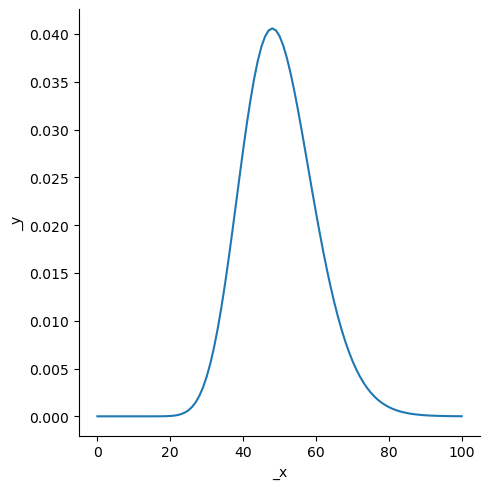

In [33]:
sns.relplot(x=x_ax, y=y, kind ='line')
plt.show()

2. Solving the example

In [35]:
chi_sq_calc = (51-1)*(2.35**2)/(2**2)
chi_sq_calc

69.03125000000001

* Calculating critical chi square for one tail test

In [37]:
chi_crit = stats.chi2.isf(0.10, 50)
chi_crit

63.167121005726315

Conclusion-
chi_critical < chi_calculated. Therefore, we reject null hypothesis